In [29]:
import vedo
import numpy as np
from magicgui import magicgui

import napari
viewer = napari.Viewer(ndisplay=3)

<Mesh(0x0000022C13E46210) at 0x0000022C192ADCA0>
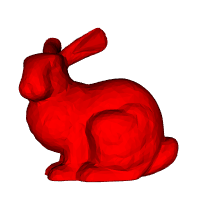

In [2]:
mesh = vedo.Mesh(vedo.dataurl + "bunny.obj")
mesh.scale(100)

In [11]:
mesh_tuple = (mesh.points(), np.asarray(mesh.faces()))

In [17]:

def cut_mesh_with_plane(input_surface: "napari.types.SurfaceData",
            origin_x: float = 0.0,
            origin_y: float = 0.0,
            origin_z: float = 0.0,
            normal_x: float = 0.0,
            normal_y: float = 0.0,
            normal_z: float = 0.0) -> "napari.types.SurfaceData":
    import vedo
    
    mesh = vedo.Mesh(input_surface)
    cut_mesh = mesh.cut_with_plane(origin=(origin_x, origin_y, origin_z),
                                   normal=(normal_x, normal_y, normal_z))
    
    return (cut_mesh.points(), np.asarray(cut_mesh.faces()))

In [7]:
widget = magicgui.magicgui(cut_mesh)
viewer.window.add_dock_widget(widget)

In [14]:
viewer.add_surface(mesh_tuple)

<Surface layer 'mesh_tuple' at 0x22c3c13ad30>

In [18]:
result = cut_mesh(mesh_tuple, origin_x=0.0, origin_y=0.0, origin_z=0.0, normal_x=0.0, normal_y=0.0, normal_z=1.0)

In [32]:
viewer.add_surface(result)

<Surface layer 'result' at 0x1fd11310e20>

In [23]:
def get_intersection_points(input_surface: "napari.types.SurfaceData"):
    import vedo
    
    mesh = vedo.Mesh(input_surface)
    bounds = mesh.boundaries()
    edge_points = bounds.points()[bounds.lines()][:, 0]
    return edge_points

def get_intersection_line(input_surface: "napari.types.SurfaceData"):
    import vedo
    
    mesh = vedo.Mesh(input_surface)
    bounds = mesh.boundaries()
    edge_points_a = bounds.points()[bounds.lines()][:, 0]
    edge_points_b = bounds.points()[bounds.lines()][:, 1]
    vectors = edge_points_b - edge_points_a
    vectors = np.stack([edge_points_a, vectors]).transpose(1, 0, 2)
    return vectors

In [24]:
edge_points = get_intersection_points(result)
edge_line = get_intersection_line(result)
viewer.add_points(edge_points, size=1)
viewer.add_vectors(edge_line, length=1)

<Vectors layer 'edge_line' at 0x22c234592e0>

In [22]:
bounds = mesh.boundaries()
edge_points_a = bounds.points()[bounds.lines()][:, 0]
edge_points_b = bounds.points()[bounds.lines()][:, 1]
vectors = edge_points_b - edge_points_a
vectors = np.stack([edge_points_a, vectors]).transpose(1, 0, 2)
viewer.add_vectors(vectors)

<Vectors layer 'vectors' at 0x22c3c2d4c70>

In [3]:
vedo.settings.default_backend = "vtk"

In [6]:
vedo_points = vedo.Points(mesh.points()[np.asarray(bounds.lines())[:, 0]])

In [28]:
viewer.layers[0].metadata

{}

In [8]:
vedo.show(vedo_points, mesh, mesh.boundaries())